In [1]:
import pandas as pd
import numpy as np
import pdfplumber

## Custom table extraction and export to csv for further manual correction

In [185]:
filepath = '/Users/wesamazaizeh/Desktop/Nanoparticle_Analysis/'
source = 'Analysis of nanoparticle delivery - supplementary.pdf'
destination = 'Analysis of nanoparticle delivery.csv'

pdf = pdfplumber.open(filepath+source)

table_settings = {
    'vertical_strategy': 'explicit',
    'explicit_vertical_lines' : [36, 105, 170, 223, 297, 355, 450, 516, 570, 628, 684, 749, 790],
    'horizontal_strategy': 'lines',
    'keep_blank_chars': True,
    'intersection_tolerance': 80, # to solve open cell on page-1 #
}

col_names = ['Material', 'Hydrodynamic diameter', 'Shape', 'Surface chemistry', 'Zeta potential', 'Tumor model and animal',\
            'Tumore stage', 'Number of time points', 'AUC tumor [%ID·h/g]', 'Tumore uptake [%ID/g]', 'Delivery efficiency [%ID]', 'Ref.']
# table boundaries imperically determined using Preview on macOS
p0_boundaries = (25, 170, 25+780, 170+350) 
general_boundaries = general_boundaries = (25, 70, 25+780, 70+440)

for i in range(0, len(pdf.pages)):
    if i<1:
        p = pdf.pages[i].within_bbox(p0_boundaries)
        table = p.extract_table(table_settings=table_settings)
        df = pd.DataFrame(table, columns=col_names)
    else:
        p = pdf.pages[i].within_bbox(general_boundaries)
        table = p.extract_table(table_settings=table_settings)
        df2 = pd.DataFrame(table, columns=col_names)
        df = df.append(df2)
        
df.to_csv(filepath+destination)

### Visualization of page cropping and table detection:

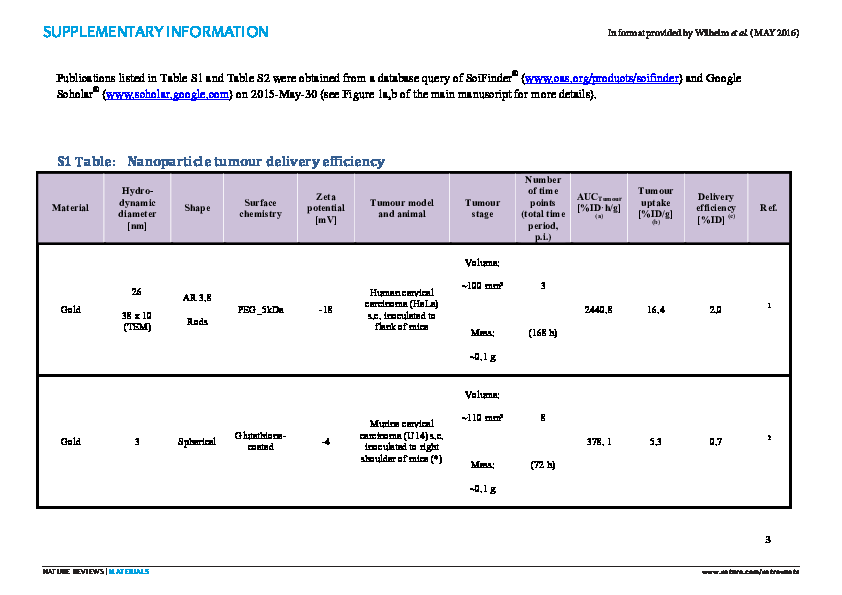

In [187]:
# view of the first page of the PDF file containing table S1 only
pdf.pages[0].to_image()

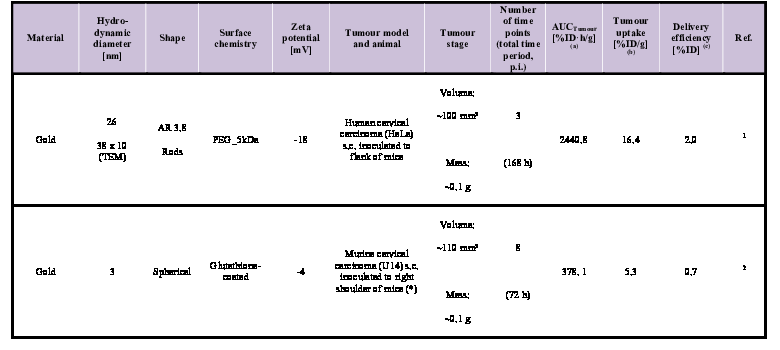

In [192]:
# view of cropped first page
pdf.pages[0].within_bbox(p0_boundaries).to_image()

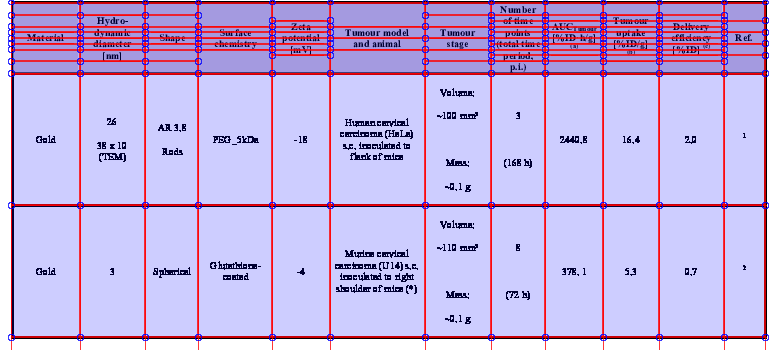

In [196]:
# view of cropped first page with detected table cells
pdf.pages[0].within_bbox(p0_boundaries).to_image().debug_tablefinder(table_settings)

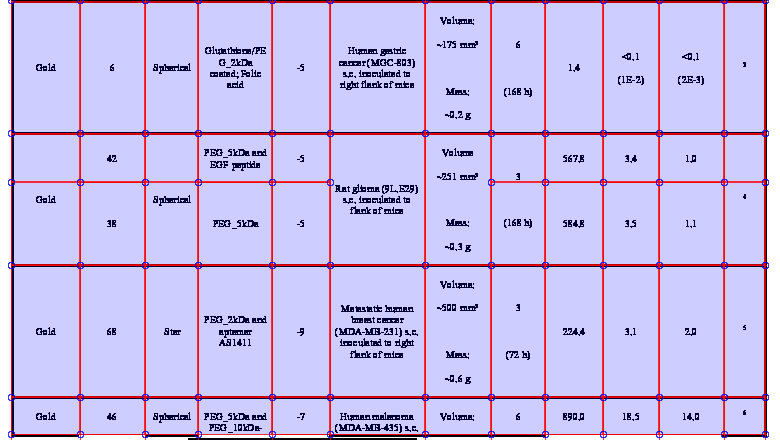

In [197]:
# view of cropped second page with detected table cells
pdf.pages[1].within_bbox(general_boundaries).to_image().debug_tablefinder(table_settings)